In [1]:
# 5

import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open("./datasets/cifar-10-batches-py/data_batch_1", "rb") as input_file:
    X = pickle.load(input_file, encoding = "latin1")

In [6]:
# gets the image matrix
X = X["data"]

X.shape

(10000, 3072)

In [7]:
# batch, chan, height, width
X = X.reshape((-1, 3, 32, 32))
X.shape

(10000, 3, 32, 32)

In [8]:
# batch, height, width, channel
X = X.transpose(0, 2, 3, 1)
X.shape

(10000, 32, 32, 3)

In [9]:
# return image nack to default shape
X = X.reshape(-1, 3072)
X.shape

(10000, 3072)

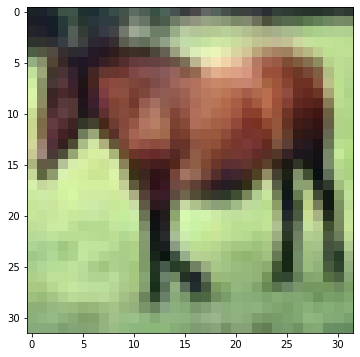

In [11]:
# view on image
plt.figure(figsize = (6, 6))
plt.imshow(X[7].reshape(32, 32, 3))
plt.show()

In [13]:
# normalizing: subtracting mean of all pixel value and dividing by std dev
X.mean(axis = 0).shape

X = X - X.mean(axis = 0)  # centers all pixel value around 0
X = X / np.std(X, axis = 0)

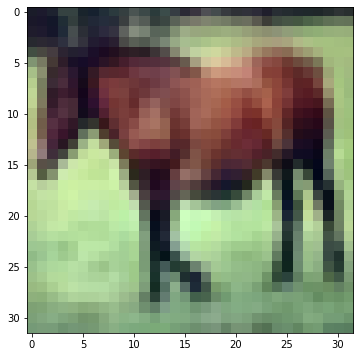

In [15]:
# display the normalized image
def show(i):
    i = i.reshape((32, 32, 3))   # reshape to form matplot understands
    m, M = i.min(), i.max()
    
    plt.figure(figsize = (6,6))
    plt.imshow((i-m) / (M - m))   # scale image to be in 0-1 range and show
    plt.show()
    
show(X[7])

***
**Decorelates Features of images(using whitening i.e multiplying input image by it's principal components)**

In [16]:
covariance_matrix = np.cov(X,  rowvar= True)  # matrix that rep how features co occurs across image

covariance_matrix.shape

(10000, 10000)

In [17]:
# dim reduce cov matrix using single value decomposition( takes time doh)
U, S, v = np.linalg.svd(covariance_matrix)

In [19]:
print(U.shape)
print(S.shape)
print(v.shape)

(10000, 10000)
(10000,)
(10000, 10000)


In [20]:
# gets zca mat containg principal components from input image
epsilon = 1e-5  # used to avoid division by zero

zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [21]:
#zca whitened image
zca = np.dot(zca_matrix, X)

In [22]:
zca.shape

(10000, 3072)

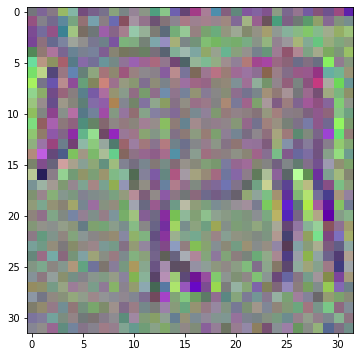

In [23]:
show(zca[7])